# Pricing and Hedging of European options under Black-Scholes and introduction of transaction costs 

In [6]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
from scipy.stats import kstest
from scipy.stats import norm
import plotly.graph_objects as go
from BlackScholes import BS
from BS_transac_costs import BS_transac_costs
from Leland import Leland

In [ ]:
Option = BS(S = 100,K = 100, T = 1, sigma = 0.2, r = 0.05,"long", q = 0,"put")

In [20]:
Option_tc = BS_transac_costs(100,100,1,0.2,0.05,0.1,"long")

In [21]:
Option_Leland = Leland(100,100,1,0.2,0.05,0.02,"long","daily")

In [22]:
Option.pricing_BS(100,0)

array(5.57352602)

In [23]:
Option.Delta(100,0)

array(-0.36316935)

# Graph representing Delta levels

In [4]:
def call_delta(S, K, T, r, sigma):
    T = np.maximum(T, 1e-8)
    d1 = (np.log(S / K) + (r + 0.5 * sigma**2) * T) / (sigma * np.sqrt(T))
    return norm.cdf(d1)

In [8]:
S = 100
r = 0.05
sigma = 0.2
strike_values = np.linspace(80, 120, 50)
time_values = np.linspace(0.01, 2, 50)  # time in years
K, T = np.meshgrid(strike_values, time_values)
Delta = call_delta(S, K, T, r, sigma)

fig = go.Figure(data=[go.Surface(x=K, y=T, z=Delta, colorscale='Viridis')])
fig.update_layout(
    title='Interactive Delta Surface for a European Call Option',
    scene=dict(
        xaxis_title='Strike (K)',
        yaxis_title='Time to Maturity (T)',
        zaxis_title='Delta'
    )
)
fig.show()

In [24]:
Option.price_trajectory('daily')

array([100.        ,  99.8507735 , 100.36948593, 100.71033499,
        99.94970426, 100.15983585, 100.74177098, 100.48041656,
       100.46772287, 101.79008405,  99.98551678, 100.54158984,
        99.86126059,  98.26079903,  98.34580431,  99.97494509,
        99.76260062, 103.03643249, 102.39006472, 103.04538441,
       102.1294162 , 104.23544593, 102.73091864, 102.73009231,
       104.01006903, 105.24537436, 107.81331156, 108.18827621,
       108.31374345, 107.91535765, 105.97508744, 108.4941344 ,
       109.17483583, 109.08117073, 108.58816573, 107.61697335,
       108.41222264, 107.16031275, 107.14846429, 107.88181892,
       107.30836826, 106.52443848, 105.17925656, 103.5707021 ,
       105.45431432, 102.59636358, 101.51342458, 102.25792888,
        98.56144538,  97.16823078,  98.13424923,  95.97263902,
        95.40333759,  96.40224482,  95.93282788,  97.13469709,
        97.23758002,  97.49520789,  96.62482641,  96.99395886,
        96.13182286,  95.16989407,  95.20263236,  95.65

In [25]:
H = Option.Hedging('hourly')
H

,Price,Option price,Delta,Buy,Depenses,Holdings,Portfolio,Error
0,100.000000,5.573526,-0.363169,-3.631693e-01,41.890461,-36.316935,5.573526,0.000000
1,100.740643,5.308531,-0.349455,1.371429e-02,40.510260,-35.204327,5.305933,0.002598
2,99.496628,5.756574,-0.372772,-2.331729e-02,42.831591,-37.089592,5.741999,0.014575
3,99.469863,5.765484,-0.373329,-5.567803e-04,42.888390,-37.134997,5.753393,0.012091
4,99.589210,5.719983,-0.371105,2.223933e-03,42.668329,-36.958073,5.710256,0.009727
...,...,...,...,...,...,...,...,...
1508,94.597006,5.389767,-1.000000,-1.183793e-06,99.836576,-94.597003,5.239573,0.150194
1509,94.643573,5.346506,-1.000000,-3.657376e-08,99.839881,-94.643573,5.196307,0.150199
1510,94.633152,5.360235,-1.000000,-3.546204e-10,99.843182,-94.633152,5.210031,0.150204
1511,93.682551,6.314142,-1.000000,-1.854072e-14,99.846484,-93.682551,6.163933,0.150209


In [26]:
Sims = Option.MonteCarlo('daily',10000)
terminal_values = [sim[-1] for sim in Sims]

/var/folders/3_/t8l3yh8s28z9_jbq7gqy7byr0000gn/T/ipykernel_81006/3459695329.py:7: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


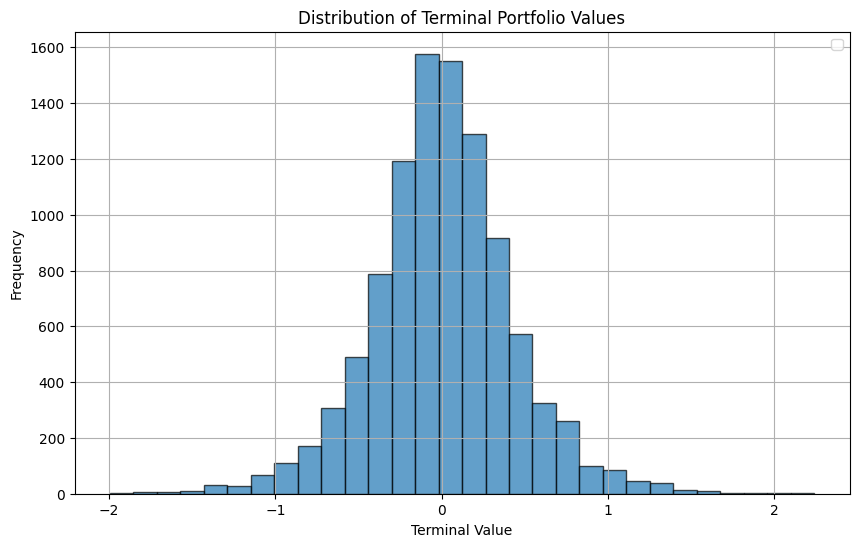

In [27]:
plt.figure(figsize=(10,6))
plt.hist(terminal_values, bins=30, edgecolor='k', alpha=0.7)
plt.title('Distribution of Terminal Portfolio Values')
plt.xlabel('Terminal Value')
plt.ylabel('Frequency')
plt.grid(True)
plt.legend()
plt.show()

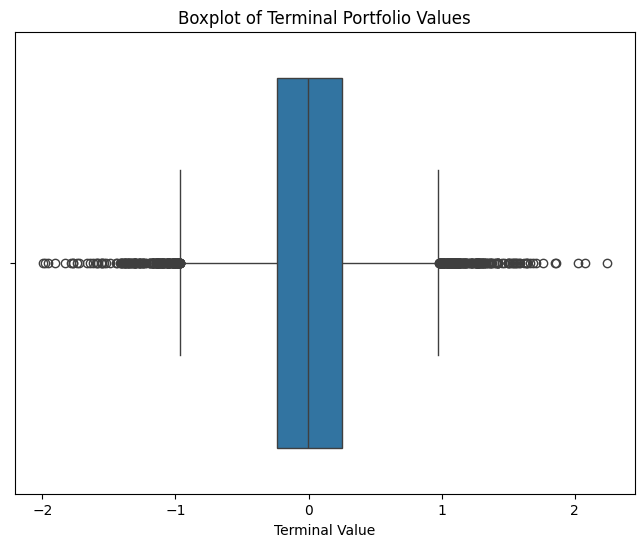

In [28]:
plt.figure(figsize=(8,6))
sns.boxplot(x=terminal_values)
plt.title('Boxplot of Terminal Portfolio Values')
plt.xlabel('Terminal Value')
plt.show()

In [29]:
mean_val = np.mean(terminal_values)
median_val = np.median(terminal_values)
std_val = np.std(terminal_values)

print(f"Mean: {mean_val:.2f}")
print(f"Median: {median_val:.2f}")
print(f"Standard Deviation: {std_val:.2f}")


Mean: 0.00
Median: -0.00
Standard Deviation: 0.43


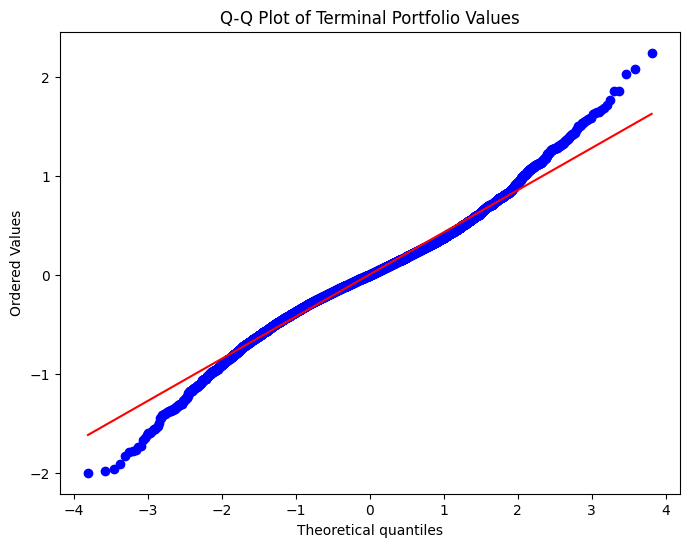

In [30]:
plt.figure(figsize=(8,6))
stats.probplot(terminal_values, dist="norm", plot=plt)
plt.title('Q-Q Plot of Terminal Portfolio Values')
plt.show()

In [31]:
normalized_values = (terminal_values - np.mean(terminal_values)) / np.std(terminal_values)
stat, p = kstest(normalized_values, 'norm')
print('Kolmogorov-Smirnov Test: Statistics=%.3f, p=%.3f' % (stat, p))

if p > 0.05:
    print('Sample looks Gaussian (fail to reject H0)')
else:
    print('Sample does not look Gaussian (reject H0)')

Kolmogorov-Smirnov Test: Statistics=0.038, p=0.000
Sample does not look Gaussian (reject H0)


# Introduction of transaction costs into Black-Scholes

In [32]:
H_tc = Option_tc.Hedging('hourly')
H_tc

,Price,Option price,Delta,Buy,Cash,Holdings,Portfolio,Error
0,100.000000,1.045058e+01,6.368307e-01,6.368307e-01,-59.600788,6.368307e+01,4.082277,6.368307
1,100.383684,1.069204e+01,6.439503e-01,7.119670e-03,-60.384986,6.464211e+01,4.257120,6.434923
2,100.765633,1.093507e+01,6.509659e-01,7.015594e-03,-61.160613,6.559499e+01,4.434380,6.500694
3,100.770618,1.093404e+01,6.510193e-01,5.342804e-05,-61.164513,6.560362e+01,4.439109,6.494934
4,101.227413,1.122904e+01,6.593224e-01,8.303097e-03,-62.087041,6.674151e+01,4.654464,6.574577
...,...,...,...,...,...,...,...,...
1508,79.082383,9.027275e-117,2.540363e-115,-3.778849e-92,-96.761097,2.008979e-113,-96.761097,96.761097
1509,79.610341,3.493273e-146,1.264223e-144,-2.540363e-115,-96.757898,1.006452e-142,-96.757898,96.757898
1510,80.304978,1.346541e-201,6.965092e-200,-1.264223e-144,-96.754698,5.593315e-198,-96.754698,96.754698
1511,80.814432,0.000000e+00,0.000000e+00,-6.965092e-200,-96.751499,0.000000e+00,-96.751499,96.751499


In [33]:
Sims_tc = Option_tc.MonteCarlo('daily',10000)
terminal_values_tc = [sim[-1] for sim in Sims_tc]

/var/folders/3_/t8l3yh8s28z9_jbq7gqy7byr0000gn/T/ipykernel_81006/3659803437.py:7: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


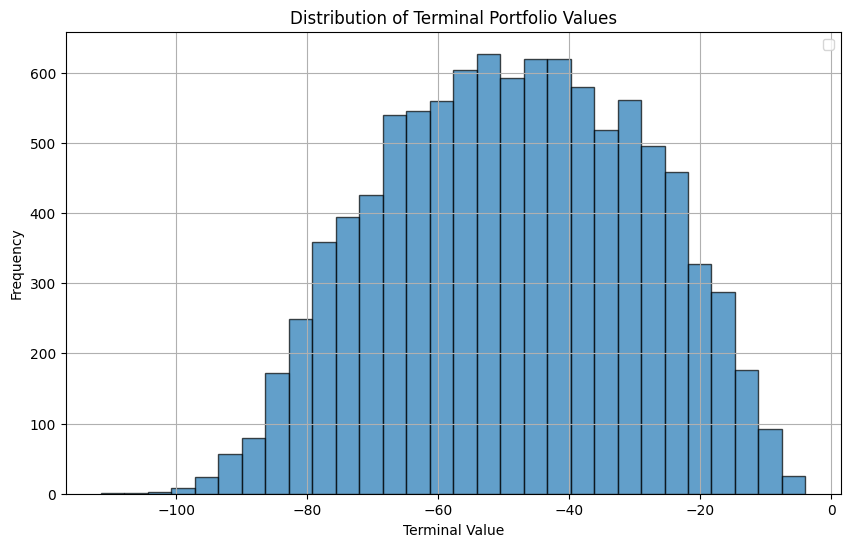

In [34]:
plt.figure(figsize=(10,6))
plt.hist(terminal_values_tc, bins=30, edgecolor='k', alpha=0.7)
plt.title('Distribution of Terminal Portfolio Values')
plt.xlabel('Terminal Value')
plt.ylabel('Frequency')
plt.grid(True)
plt.legend()
plt.show()

# Shortcomings of the Black Scholes model

### - constant risk free rate and volatility (easily fixable)
### - no dividends from the underlying (can easily be fixed with Merton)
### - no consideration of transaction costs 
### - relies on continous adjustment in hedging (doesn't work with transaction costs)

# Leland Model

- Leland proposes a modification of the variance in the black scholes model to take into account the increased riskiness in the option introduced by transaction costs.
- The new variance is : $\sigma_L = \sigma\sqrt{1+\sqrt{\frac{2}{\pi}}\frac{c}{\sigma \Delta t}}$

In [35]:
P_BS = Option.pricing_BS(100,0)
P_BS_tc = Option_tc.pricing_BS(100,0)
P_Leland = Option_Leland.pricing_Leland(100,0)
print(f'Black Scholes price : {P_BS}; BS with costs price : {P_BS_tc}; Leland price : {P_Leland}')

Black Scholes price : 5.573526022256971; BS with costs price : 10.450583572185565; Leland price : 37.02950128007171


In [ ]:
Test